In [14]:
import nltk
import numpy as np
import re # remove regex
import pandas as pd 

%matplotlib inline

from sklearn.cluster import KMeans
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
import matplotlib.pyplot as plt

In [3]:
## Get multiple outputs in the same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [4]:
## Display all rows and columns of a dataframe instead of a truncated version
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df = pd.read_csv("../Data/processed.csv")
df.head()

username        date  \
0  shivaji_takey  10-06-2020   
1  sarasberiwala  10-06-2020   
2     chitreamod  10-06-2020   
3   sanjan_suman  10-06-2020   
4       t_nihsit  10-06-2020   

                                               tweet        mentions  \
0  Please check what happens to this no 940417705...  ['vodafonein']   
1  Network fluctuations and 4G Speed is pathetic....  ['vodafonein']   
2  This has been going on since 3rd... this absol...  ['vodafonein']   
3  @VodafoneIN  I have done my recharge of 555 on...  ['vodafonein']   
4  But when???Still I am not received any call fr...  ['vodafonein']   

                                          Clean_text  Clean_text_length  
0  please check what happens this not woking sinc...                 68  
1  network fluctuations and speed pathetic need j...                 78  
2  this has been going since this absolutely unpr...                 56  
3  have done recharge but haven got perday with u...                178  
4  but when still not received any call from cust...                 74

###### Count Vectorization

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer='word',ngram_range=(1,1), stop_words='english', min_df = 0.0001, max_df=0.7)
count_vect.fit(df['Clean_text'])
desc_matrix = count_vect.transform(df["Clean_text"])
desc_matrix

CountVectorizer(max_df=0.7, min_df=0.0001, stop_words='english')

<19761x6743 sparse matrix of type '<class 'numpy.int64'>'
	with 198134 stored elements in Compressed Sparse Row format>

In [11]:
desc_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [12]:
desc_matrix.shape

(19761, 6743)

#### Clustering

###### 2 Clusters

In [15]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

KMeans(n_clusters=2)

In [16]:
tweets = {'Tweet': df["Clean_text"].tolist(), 'Cluster': clusters}
frame = pd.DataFrame(tweets, index = [clusters])
frameframe['Cluster'].value_counts()

Tweet  Cluster
1  please check what happens this not woking sinc...        1
1  network fluctuations and speed pathetic need j...        1
1  this has been going since this absolutely unpr...        1
1  have done recharge but haven got perday with u...        1
1  but when still not received any call from cust...        1
1  mere area vodafone network nai raha hai bhitol...        1
1  thanks but have visited the website called you...        1
1  today vodafone cim deactivated without any inf...        1
1  dear vodafone have already responded your repl...        1
1  sir our market area bilkul network nahi raha c...        1
0  why the hell previous plan deactivated and why...        0
1  vodafone netwrk worst ever using from many yea...        1
1               internet not working pls assist asap        1
1                       still waiting for your reply        1
1  reverse migration zamana hai dear alu kar wapa...        1
1  unable access your website and showing connect...        1
1  worst customer care charged for internet postp...        1
0  double data speed #same you vodafone pic twitt...        0
1  call drops are very high this day facing this ...        1
1  please help with the exact process changing ow...        1
1                  haven received any message update        1
1                           can expect your response        1
1  when can assure your customers that service wi...        1
1        gonna port into network hope works out well        1
1  someone has misused documents get sim card and...        1
1                              bari jaldi reply gaya        1
1  sent you private message monday night itself h...        1
0  have already used the link and done pia please...        0
1  navyug market ghaziabad uttar praders please a...        1
1  not buy internet service from you broad band a...        1
1  such sorry state affairs your south extension ...        1
1  very bad network coverage vodafone call drops ...        1
0  super fast network thank you pic twitter com k...        0
1  after complaining again and again one has solv...        1
0  you can provide the speed sufficient network p...        0
1  why don vodafone provide any recharge offers a...        1
1  complaints reference says resolved but after d...        1
1  pathetic network vodafone they say they have f...        1
1  consecutive day still issue same worst service...        1
1  request for call back you committed the same i...        1
1  purpose still not solved aftet manually networ...        1
1                            response till now check        1
1  hello rekha dailing skip the advisory doesn wo...        1
1                      required details kindly reply        1
1      how one supposed pay bill when your site down        1
1  facing network coverage home try communicate w...        1
0  are bhai company wale mera bhi sim sale sab je...        0
1  fon varum ellam sheriyakum paisa evide ninnum ...        1
1  spotify not working only your data platform an...        1
1  contacts are saying they are getting calls rep...        1
1                            inbox details pls check        1
1  not going due number not working for verification        1
1  have provided the details yesterday but haven ...        1
0  this happening since morning and happens every...        0
1  don you think high time this annoying caller t...        1
1  same here our services are down and isn respon...        1
1  sense complaining such worst network and disre...        1
0  this your internet speed complaining again aga...        0
1  taken survey and hope will able help and resol...        1
1  may because the network pathetic and doesn con...        1
1  too much slow network before one week facing m...        1
1  how can get call details record april may lock...        1
1  would expect brand like vodafone with good cus...        1
1  vilpower vodafone idea charged send transactio...        1
1                

In [17]:
frame['Cluster'].value_counts()

1    15991
0     3770
Name: Cluster, dtype: int64

In [18]:
cluster_0=frame[frame['Cluster'] == 0]
cluster_0

Tweet  Cluster
0  why the hell previous plan deactivated and why...        0
0  double data speed #same you vodafone pic twitt...        0
0  have already used the link and done pia please...        0
0  super fast network thank you pic twitter com k...        0
0  you can provide the speed sufficient network p...        0
0  are bhai company wale mera bhi sim sale sab je...        0
0  this happening since morning and happens every...        0
0  this your internet speed complaining again aga...        0
0  did not subscribe for any service didn receive...        0
0    again network porting out pic twitter com kmglv        0
0  response from your end don know why you people...        0
0  link shown that frc can done with plan then wh...        0
0  dear finally some how got message for your tea...        0
0  understand how inconvenient this could please ...        0
0                           pic twitter com owexqgii        0
0  god knowns when the call will come #waiting #p...        0
0  here comes the standard reply your customer ca...        0
0  not getting any store call email solutions dec...        0
0  hey can get blocklist for promotional messages...        0
0                     shame https twitter com status        0
0  your deadline for call back that was june has ...        0
0  this the case with almost all signals reading ...        0
0     best network ported pic twitter com vzz sestqk        0
0  what working what assurance action tkn since m...        0
0  pathetic network service but still charge mone...        0
0                            pic twitter com quf xaj        0
0  useless left will soon touch thanks for provid...        0
0  use sending that sms still getting bombarded y...        0
0  dear team had already provided contact details...        0
0    need clarification this one pic twitter com tzj        0
0  ques this signal https twitter com vilakudy st...        0
0             network user pic twitter com zeseulcqk        0
0  are setting new highs the quarter losses from ...        0
0  one did call even worked the connectivity stop...        0
0  this how after received the call from #airtel ...        0
0  shameless people called and asking why you wan...        0
0  dear have ported number into due worst network...        0
0  could you please help get mnp disaster #airtel...        0
0  hello #airtel disaster still not awake always ...        0
0  you can help and please help with your plans h...        0
0  anyone tweet twitter instantly you replied ple...        0
0  https www google com amp www thehindubusinessl...        0
0  have sent all details and please for change pl...        0
0  unable send text messages from yesterday kindl...        0
0  give proper network first plz #bill pic twitte...        0
0  have received response from your side and the ...        0
0  very poor performance our area last month ther...        0
0  reminder worst vodafone https twitter com adhi...        0
0  how many mobile#are running over same imei ple...        0
0  how many mobile#are running over same imei ple...        0
0  how many mobile#are running over same imei ple...        0
0  here download speed mbps most important thing ...        0
0       this your support pic twitter com okrirjiuqj        0
0  what this doesn matter for you complain nothin...        0
0  just reminding that has not fired this hinduph...        0
0  calling vodafone but showing jio general helpl...        0
0  year month days and counting refund money you ...        0
0  please try understand the urgency your valuabl...        0
0  with ladies and gentlemen pic twitter com palg...        0
0  why bill generated even services not given boy...        0
0  this what expect your network wrost even delhi...        0
0  any plan improve your network you just want lo...        0
0  #vodafone #vodafoneindia chk https twitter com...        0
0  have recharged with plan during double data of...        0
0  still facing m

In [19]:
def wordcloud(cluster):
  # combining the image with the dataset
  Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

  # We use the ImageColorGenerator library from Wordcloud 
  # Here we take the color of the image and impose it over our wordcloud
  image_colors = ImageColorGenerator(Mask)

  # Now we use the WordCloud function from the wordcloud library 
  wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(cluster)

  # Size of the image generated 
  plt.figure(figsize=(10,20))

  # Here we recolor the words from the dataset to the image's color
  # recolor just recolors the default colors to the image's blue color
  # interpolation is used to smooth the image generated 
  plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

  plt.axis('off')
  plt.show()

In [20]:
cluster_0_words = ' '.join(text for text in cluster_0['Tweet'])

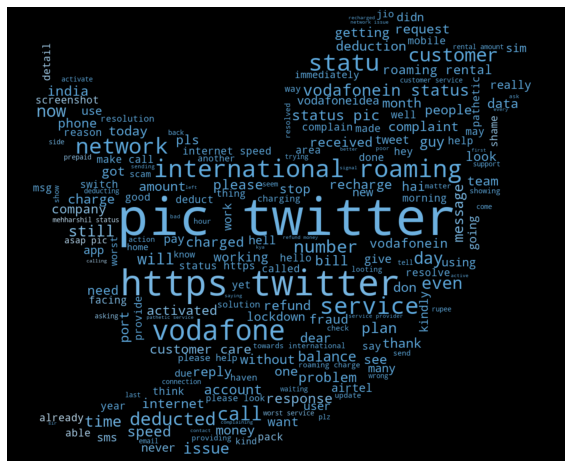

In [21]:
wordcloud(cluster_0_words)

In [25]:
cluster_1=frame[frame['Cluster'] == 1]

In [27]:
cluster_1_words = ' '.join(text for text in cluster_1['Tweet'])

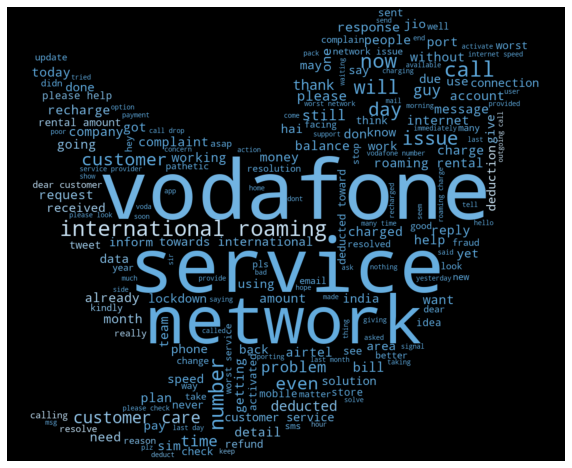

In [29]:
wordcloud(cluster_1_words)

###### 8 Clusters

In [30]:
um_clusters = 8
km = KMeans(n_clusters=num_clusters)
km.fit(desc_matrix)
clusters = km.labels_.tolist()

KMeans(n_clusters=2)

In [31]:
tweets = {'Tweet': df["Clean_text"].tolist(), 'Cluster': clusters}
frame = pd.DataFrame(tweets, index = [clusters])
frame.head()

Tweet  Cluster
0  please check what happens this not woking sinc...        0
0  network fluctuations and speed pathetic need j...        0
0  this has been going since this absolutely unpr...        0
0  have done recharge but haven got perday with u...        0
0  but when still not received any call from cust...        0

In [32]:
frame['Cluster'].value_counts()

0    15991
1     3770
Name: Cluster, dtype: int64

In [34]:
def identify_topics(df, desc_matrix, num_clusters):
    km = KMeans(n_clusters=num_clusters)
    km.fit(desc_matrix)
    clusters = km.labels_.tolist()
    tweets = {'Tweet': df["Clean_text"].tolist(), 'Cluster': clusters}
    frame = pd.DataFrame(tweets, index = [clusters])
    print(frame['Cluster'].value_counts())

    
    for cluster in range(num_clusters):
        cluster_words = ' '.join(text for text in frame[frame['Cluster'] == cluster]['Tweet'])
        wordcloud(cluster_words)
        

2    8691
4    2477
1    1928
6    1583
5    1451
7    1384
0    1191
3    1056
Name: Cluster, dtype: int64


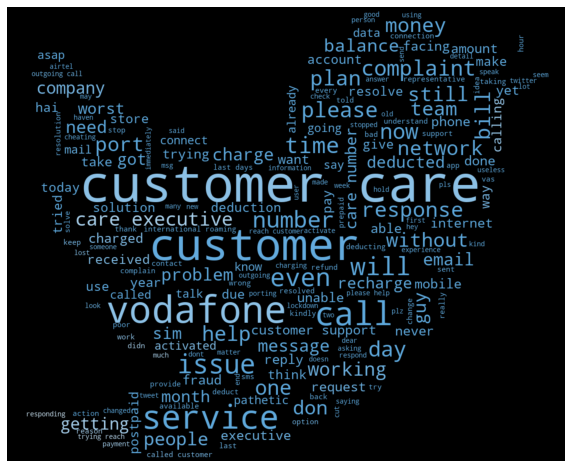

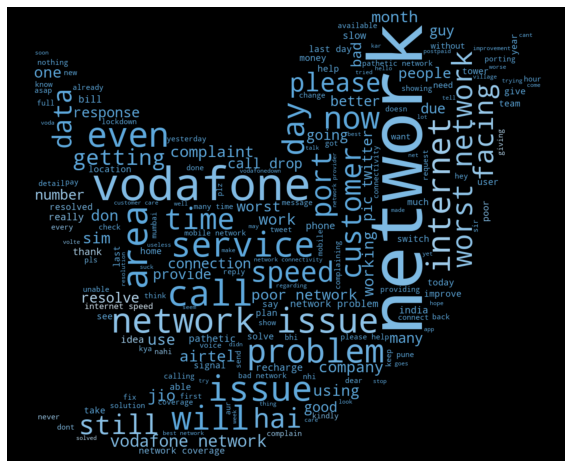

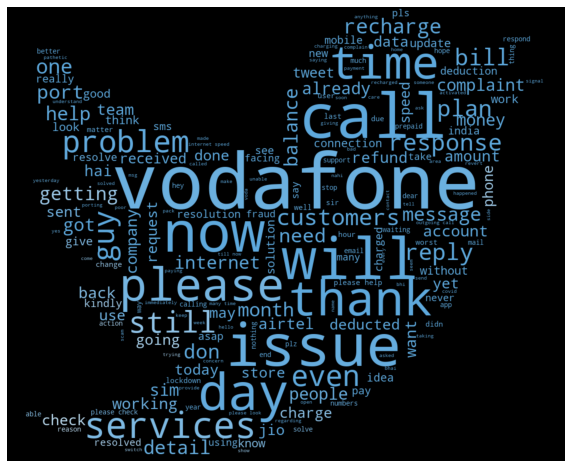

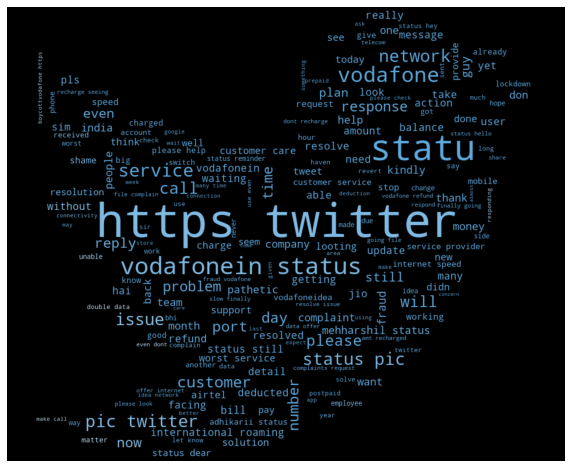

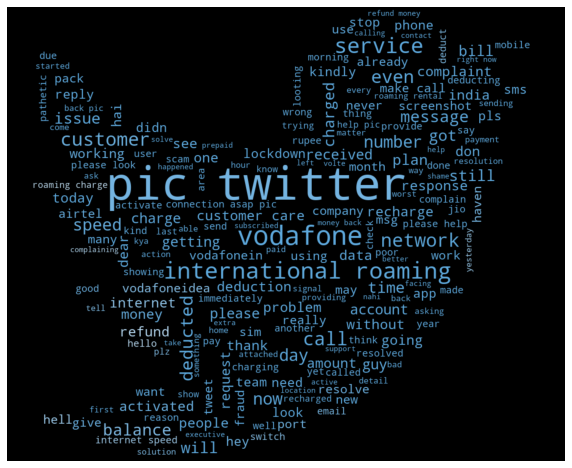

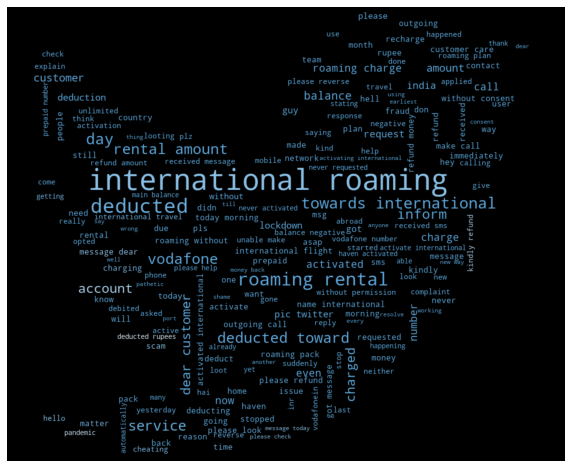

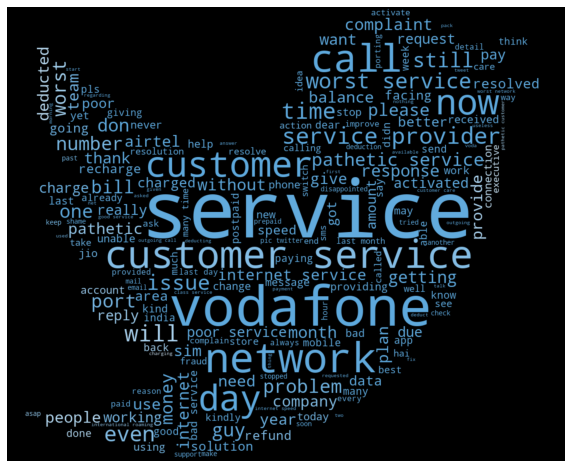

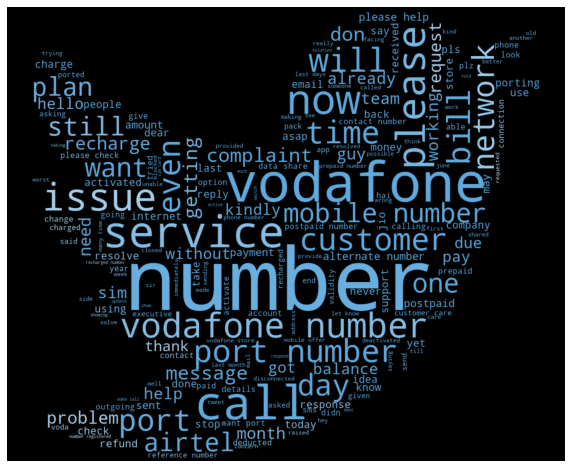

In [35]:
identify_topics(df, desc_matrix, 8)

In [36]:
frame.to_csv('../Data/clustered_tweets.csv') 